In [4]:
import os, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# folders
BASE = pathlib.Path(".")
DATA = BASE / "data" / "raw"
REPORTS = BASE / "reports"
FIGS = REPORTS / "figures"
FIGS.mkdir(parents=True, exist_ok=True)

pd.set_option("display.max_columns", 50)


In [5]:
df = pd.read_csv(DATA / "tabular.csv")
print(df.shape)
df.head()


(1000, 9)


,age,gender,bmi,sbp,dbp,glucose,hypertension,diabetes_risk,los_days
0,24,F,22.5,123.0,72.0,84.0,0,0,3.0
1,73,F,32.5,117.0,104.0,95.0,0,1,6.0
2,65,F,27.2,139.0,80.0,84.0,0,0,5.0
3,49,F,25.3,121.0,92.0,71.0,0,0,3.0
4,49,M,26.4,119.0,79.0,115.0,0,0,3.0


In [6]:
display(df.dtypes.to_frame("dtype"))
display(df.isna().sum().to_frame("missing"))
display(df.describe(include="number").round(2))
display(df.describe(include="object"))

# save a quick summary to CSV (handy for your report)
summary = {
    "rows": [len(df)],
    "columns": [df.shape[1]],
    "numeric_cols": [df.select_dtypes(include="number").shape[1]],
    "categorical_cols": [df.select_dtypes(exclude="number").shape[1]],
    "missing_total": [int(df.isna().sum().sum())],
}
pd.DataFrame(summary).to_csv(REPORTS / "eda_summary.csv", index=False)
print("Saved:", REPORTS / "eda_summary.csv")


,dtype
age,int64
gender,object
bmi,float64
sbp,float64
dbp,float64
glucose,float64
hypertension,int64
diabetes_risk,int64
los_days,float64


,missing
age,0
gender,0
bmi,0
sbp,0
dbp,0
glucose,0
hypertension,0
diabetes_risk,0
los_days,0


,age,bmi,sbp,dbp,glucose,hypertension,diabetes_risk,los_days
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.0,1000.00,1000.00
mean,53.73,26.53,125.43,80.21,109.43,0.2,0.45,4.39
std,20.79,6.09,18.18,11.84,24.85,0.4,0.50,1.92
min,18.00,8.70,70.00,47.00,31.00,0.0,0.00,1.00
25%,35.00,22.60,113.00,72.00,93.00,0.0,0.00,3.00
50%,54.00,26.80,126.00,80.00,109.00,0.0,0.00,4.00
75%,72.00,30.70,138.00,88.00,125.00,0.0,1.00,6.00
max,89.00,44.50,180.00,117.00,196.00,1.0,1.00,10.00


,gender
count,1000
unique,2
top,M
freq,507


Saved: reports\eda_summary.csv


diabetes_risk counts:
 diabetes_risk
0    549
1    451
Name: count, dtype: int64
diabetes_risk %:
 diabetes_risk
0    54.9
1    45.1
Name: count, dtype: float64


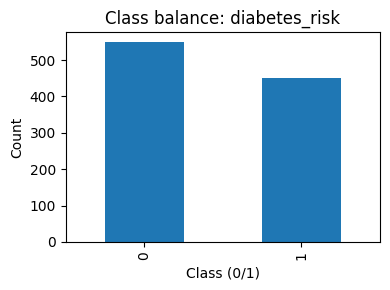

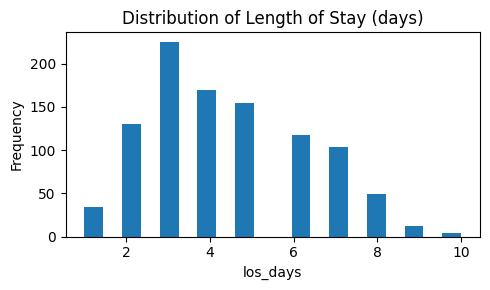

In [7]:
# Classification target balance
cls_counts = df["diabetes_risk"].value_counts().sort_index()
cls_pct = (cls_counts / len(df) * 100).round(1)
print("diabetes_risk counts:\n", cls_counts)
print("diabetes_risk %:\n", cls_pct)

# Bar chart
plt.figure(figsize=(4,3))
cls_counts.plot(kind="bar")
plt.title("Class balance: diabetes_risk")
plt.xlabel("Class (0/1)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(FIGS / "cls_balance.png", dpi=150)
plt.show()

# Regression target (LOS) distribution
plt.figure(figsize=(5,3))
plt.hist(df["los_days"], bins=20)
plt.title("Distribution of Length of Stay (days)")
plt.xlabel("los_days"); plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig(FIGS / "los_hist.png", dpi=150)
plt.show()


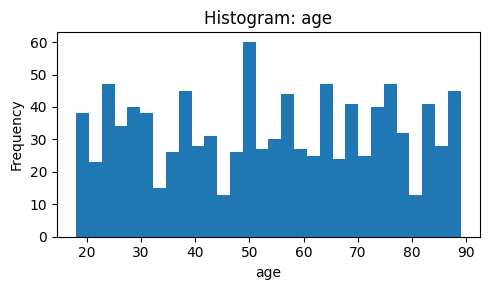

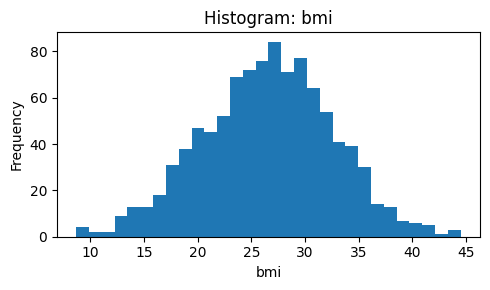

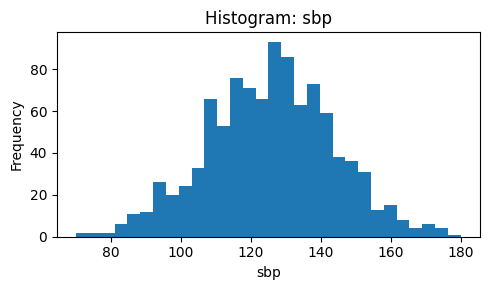

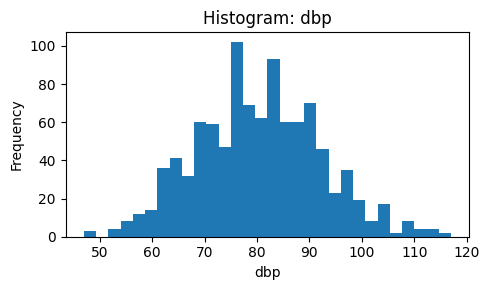

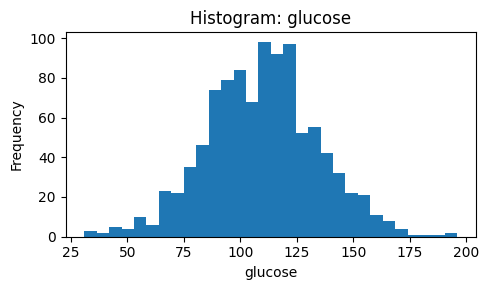

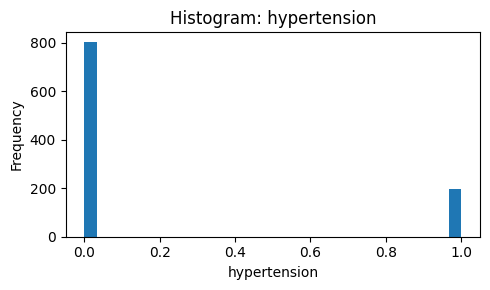

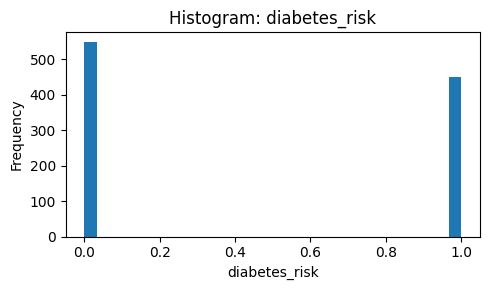

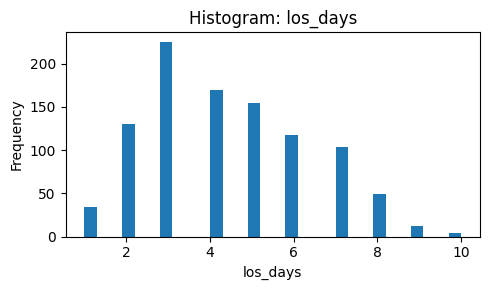

C:\Users\G.Narayan\AppData\Local\Temp\ipykernel_11156\1614200545.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[c].values for c in num_cols], labels=num_cols, vert=False)


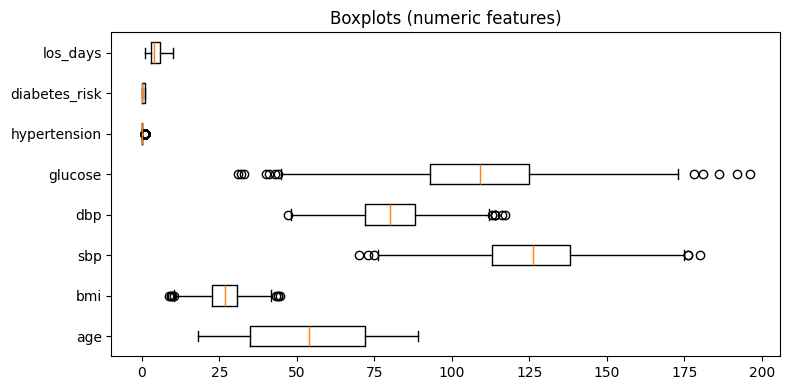

In [8]:
num_cols = df.select_dtypes(include="number").columns.tolist()
num_cols = [c for c in num_cols if c not in []]  # keep all numeric

# Histograms
for c in num_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df[c], bins=30)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c); plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(FIGS / f"hist_{c}.png", dpi=120)
    plt.show()

# Boxplots for quick outlier glance
plt.figure(figsize=(8,4))
plt.boxplot([df[c].values for c in num_cols], labels=num_cols, vert=False)
plt.title("Boxplots (numeric features)")
plt.tight_layout()
plt.savefig(FIGS / "boxplots_numeric.png", dpi=150)
plt.show()


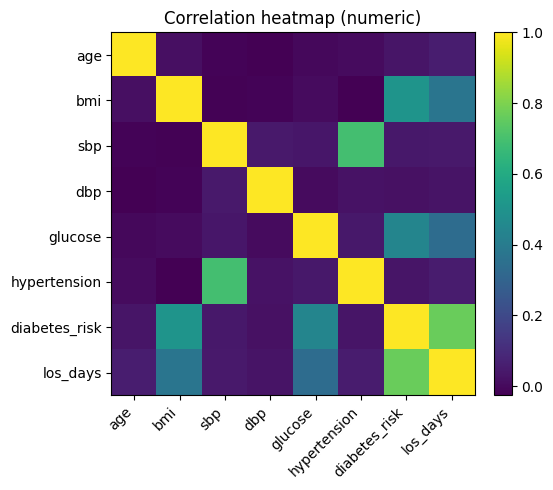

,age,bmi,sbp,dbp,glucose,hypertension,diabetes_risk,los_days
age,1.00,0.02,-0.02,-0.02,-0.00,0.01,0.03,0.06
bmi,0.02,1.00,-0.02,-0.02,0.00,-0.03,0.51,0.37
sbp,-0.02,-0.02,1.00,0.04,0.04,0.69,0.04,0.04
dbp,-0.02,-0.02,0.04,1.00,0.00,0.02,0.02,0.03
glucose,-0.00,0.00,0.04,0.00,1.00,0.04,0.44,0.34
hypertension,0.01,-0.03,0.69,0.02,0.04,1.00,0.03,0.05
diabetes_risk,0.03,0.51,0.04,0.02,0.44,0.03,1.00,0.77
los_days,0.06,0.37,0.04,0.03,0.34,0.05,0.77,1.00


In [9]:
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(6,5))
im = plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation heatmap (numeric)")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.savefig(FIGS / "corr_heatmap.png", dpi=150)
plt.show()

corr.round(2)


In [12]:
import joblib, numpy as np, pandas as pd

# load artifacts
pre = joblib.load("artifacts/preprocessor.joblib")
clf = joblib.load("models/model_cls.joblib")

# schema the preprocessor was trained on (raw df minus targets)
feature_cols = pd.read_csv("data/raw/tabular.csv", nrows=1)\
                 .drop(columns=["diabetes_risk","los_days"]).columns.tolist()

# your input
row = {"age":60,"gender":"M","bmi":32.0,"sbp":150,"dbp":92,"glucose":135}
# compute required derived field
row["hypertension"] = int(row["sbp"] > 140)

# make a 1-row DataFrame with the exact same columns (order doesn’t matter, we just align)
sample_df = pd.DataFrame([row])[feature_cols]

# transform & predict probability
x = pre.transform(sample_df)
risk = float(clf.predict_proba(x)[:,1][0])
risk


0.9735322328859035